In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
import math

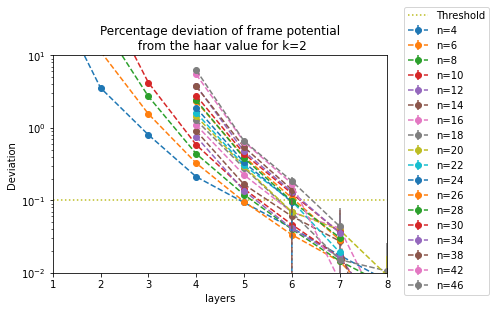

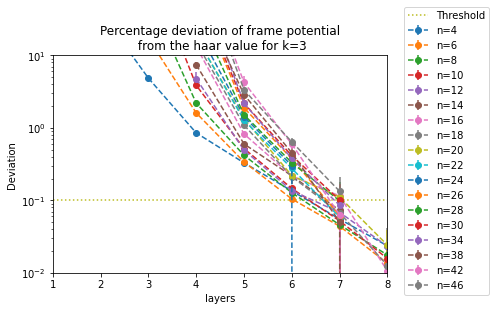

"\nk=2\nhaar = math.factorial(k)\nfor n in [2,6,10,15,20,35,50]:\n        data = np.log(frame_potential[n-1, min_l-1:max_l, k-1, 0]-haar)\n        if ~np.all(np.isnan(data)):\n            plt.plot(x, data, label='n={}'.format(n), marker='o', ls='--')\nhaar = np.log(math.factorial(k))\n#plt.yscale('log')\nplt.plot(x, np.ones(max_l+1-min_l)*haar, ':', label='Haar')\nplt.plot(x, np.ones(max_l+1-min_l)*haar*1.1, ':', label='Threshold')\n#plt.ylim(0.99*haar,2*haar)\nplt.xlim(4,10)\nplt.xlabel('layers')\nplt.ylabel('Frame Potential')\nplt.title('k={}'.format(k))\nplt.legend()\nplt.show()"

In [5]:
#frame_potential = np.load('/home/minzhao.liu/Frame_Potential/results/PRU/frame_potential.npy')
frame_potential = np.load('/lcrc/project/perfopt/minzhao.liu/Frame_Potential/results/barren_plateau/combined/frame_potential.npy')

max_ns = 48
min_ns = 4
qubit_increment = 2
max_l = 8
min_l = 1
max_k = 3
x = np.linspace(min_l, max_l, num=max_l+1-min_l)
for k in range(2,max_k+1):
    haar = math.factorial(k)
    #for n in range(min_ns, max_ns+1, qubit_increment):
    #for n in [2,6,10,15,20,35,50]:
    #for n in [2,4,6,8,10,50]:
    for n in range(min_ns, max_ns+qubit_increment, qubit_increment):
        data = frame_potential[n-1, min_l-1:max_l, k-1]/haar
        data[:, 0] -= 1
        if ~np.all(np.isnan(data)):
            #data[:,1] = 0
            plt.errorbar(x, data[:,0], label='n={}'.format(n), yerr=data[:,1], fmt='o', ls='--')
    haar = math.factorial(k)
    plt.yscale('log')
    plt.plot(x, np.ones(max_l+1-min_l)*0.1, ':', label='Threshold')
    plt.ylim(0.01,10)
    plt.xlim(min(x),max(x))
    plt.xlabel('layers')
    plt.ylabel('Deviation')
    plt.title('Percentage deviation of frame potential\n from the haar value for k={}'.format(k))
    plt.legend(loc=(1.05,-0.1))
    plt.savefig('Error vs layers k={}.pdf'.format(k))
    plt.show()
'''
k=2
haar = math.factorial(k)
for n in [2,6,10,15,20,35,50]:
        data = np.log(frame_potential[n-1, min_l-1:max_l, k-1, 0]-haar)
        if ~np.all(np.isnan(data)):
            plt.plot(x, data, label='n={}'.format(n), marker='o', ls='--')
haar = np.log(math.factorial(k))
#plt.yscale('log')
plt.plot(x, np.ones(max_l+1-min_l)*haar, ':', label='Haar')
plt.plot(x, np.ones(max_l+1-min_l)*haar*1.1, ':', label='Threshold')
#plt.ylim(0.99*haar,2*haar)
plt.xlim(4,10)
plt.xlabel('layers')
plt.ylabel('Frame Potential')
plt.title('k={}'.format(k))
plt.legend()
plt.show()'''

In [3]:
cond = np.zeros((frame_potential.shape)[:3])
cond[:,:,:] = False
met_layer = np.zeros((max_ns, max_k))
met_layer[:,:] = np.nan
for k in range(1, max_k+1):
    haar = math.factorial(k)
    cond[:,:,k-1] = (frame_potential[:,:,k-1,0] < haar*1.5) * (frame_potential[:,:,k-1,1] < haar/10)
for n in range(max_ns):
    for k in range(max_k):
        cond_for_layers = cond[n,:,k]
        try:
            layer = np.where(cond_for_layers==1)[0].min()+1
            met_layer[n,k] = layer
        except ValueError:
            pass
        
print(met_layer)

[[nan nan nan nan]
 [ 3.  3.  3.  3.]
 [nan nan nan nan]
 [ 3.  3.  4.  4.]
 [nan nan nan nan]
 [ 3.  3.  4.  5.]
 [nan nan nan nan]
 [ 3.  4.  5.  6.]
 [nan nan nan nan]
 [ 3.  4.  6.  7.]
 [nan nan nan nan]
 [ 3.  4.  6.  7.]
 [nan nan nan nan]
 [ 3.  5.  7.  8.]
 [nan nan nan nan]
 [ 3.  5.  7.  8.]
 [nan nan nan nan]
 [ 3.  5.  7.  8.]
 [nan nan nan nan]
 [ 3.  5.  7.  9.]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [ 4.  6.  8.  9.]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [ 4.  6.  8. 10.]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [ 4.  6.  8. 10.]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [ 4.  7.  9. 10.]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [ 4.  7.  9. 10.]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [ 4.  7.  9. 11.]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [ 4.  7.  9. 12.]]


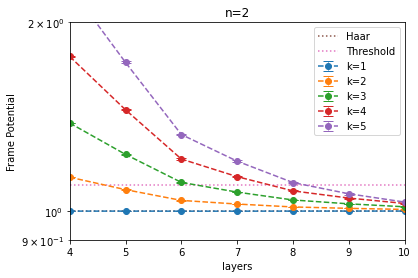

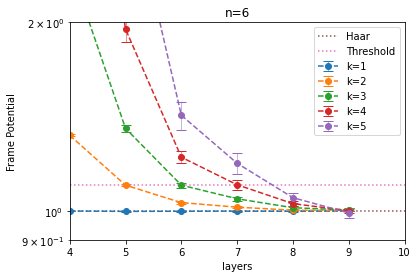

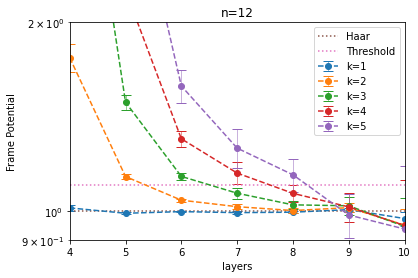

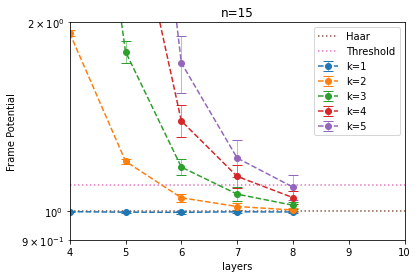

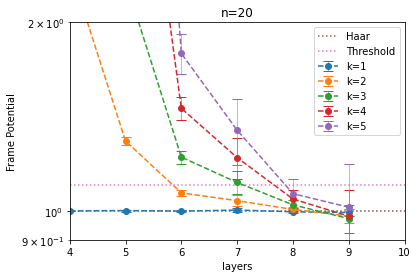

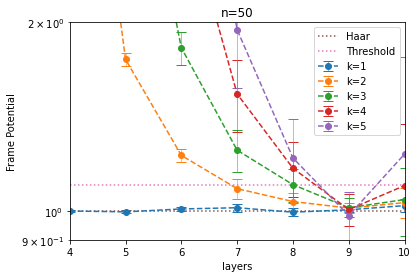

In [20]:
max_ns = 75
min_ns = 2
qubit_increment = 2
max_l = 10
min_l = 4
max_k = 5
x = np.linspace(min_l, max_l, num=max_l+1-min_l)
#for n in range(min_ns, max_ns+2, qubit_increment):
for n in [2,6,12,15,20,50]:
    for k in range(1,max_k+1):
        haar = math.factorial(k)
        data = frame_potential[n-1, min_l-1:max_l, k-1]/haar
        if ~np.all(np.isnan(data)):
            plt.errorbar(x, data[:,0], label='k={}'.format(k), yerr=data[:,1], fmt='o', ls='--', capsize=5, elinewidth=0.5)
    plt.plot(x, np.ones(max_l+1-min_l), ':', label='Haar')
    plt.plot(x, np.ones(max_l+1-min_l)*1.1, ':', label='Threshold')
    plt.yscale('log')
    plt.ylim(0.9,2)
    plt.xlim(4,10)
    plt.xlabel('layers')
    plt.ylabel('Frame Potential')
    plt.title('n={}'.format(n))
    plt.legend()
    plt.show()

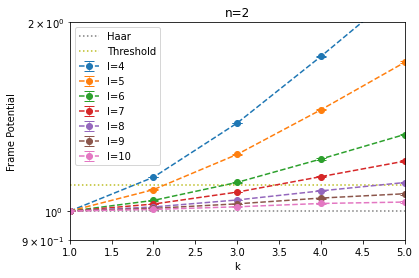

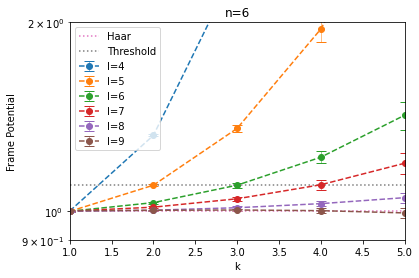

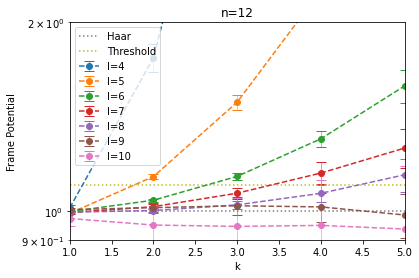

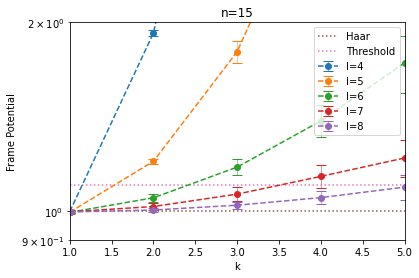

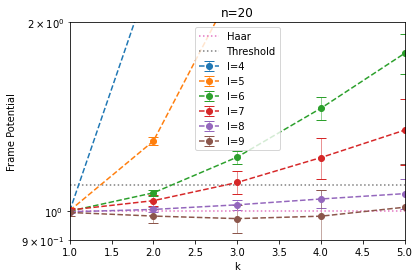

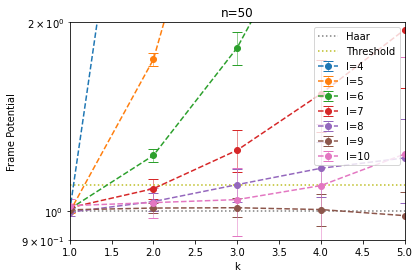

In [22]:
max_ns = 50
min_ns = 2
qubit_increment = 4
max_l = 10
min_l = 4
max_k = 5
k = np.linspace(1, max_k, num=max_k)
haar = scipy.special.factorial(k).repeat(2).reshape(max_k, 2)
for n in [2,6,12,15,20,50]:
    for l in range(min_l,max_l+1):
        data = frame_potential[n-1, l-1, :max_k]/haar
        if ~np.all(np.isnan(data)):
            plt.errorbar(k, data[:,0], label='l={}'.format(l), yerr=data[:,1], fmt='o', ls='--', capsize=5, elinewidth=0.5)
    plt.plot(k, np.ones(max_k), ':', label='Haar')
    plt.plot(k, np.ones(max_k)*1.1, ':', label='Threshold')
    plt.yscale('log')
    plt.ylim(0.9,2)
    plt.xlim(1,max_k)
    plt.xlabel('k')
    plt.ylabel('Frame Potential')
    plt.title('n={}'.format(n))
    plt.legend()
    plt.show()

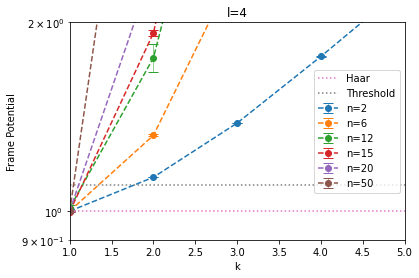

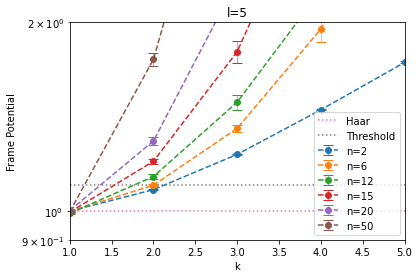

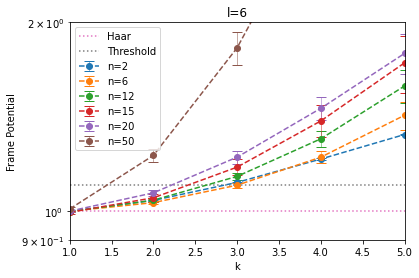

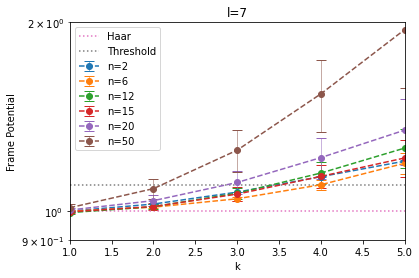

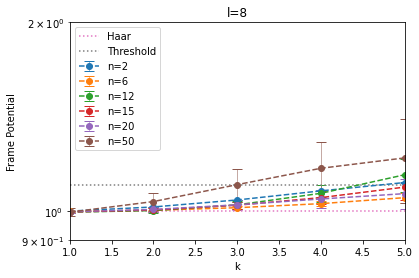

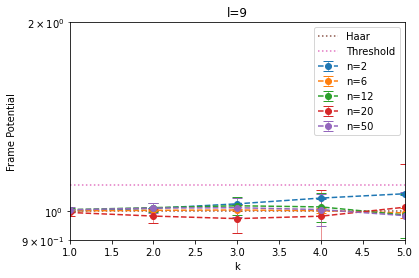

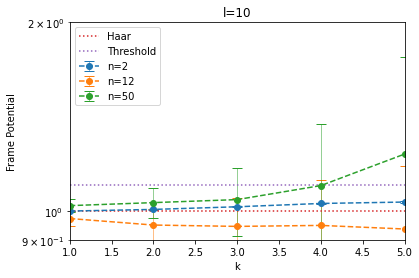

In [23]:
max_ns = 22
min_ns = 2
qubit_increment = 2
max_l = 10
min_l = 4
max_k = 5
k = np.linspace(1, max_k, num=max_k)
haar = scipy.special.factorial(k).repeat(2).reshape(max_k, 2)
for l in range(min_l,max_l+1):
    for n in [2,6,12,15,20,50]:
        data = frame_potential[n-1, l-1, :max_k]/haar
        if ~np.all(np.isnan(data)):
            plt.errorbar(k, data[:,0], label='n={}'.format(n), yerr=data[:,1], fmt='o', ls='--', capsize=5, elinewidth=0.5)
    plt.plot(k, np.ones(max_k), ':', label='Haar')
    plt.plot(k, np.ones(max_k)*1.1, ':', label='Threshold')
    plt.yscale('log')
    plt.ylim(0.9,2)
    plt.xlim(1,max_k)
    plt.xlabel('k')
    plt.ylabel('Frame Potential')
    plt.title('l={}'.format(l))
    plt.legend()
    plt.show()

In [94]:
data = np.random.rand(1000)
data = (data,)
res = scipy.stats.bootstrap(data, np.mean, confidence_level=0.9)
print(res)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.4832958491931497, high=0.5133857705855916), standard_error=0.009137997902141426)
